In [1]:
import pandas as pd
import numpy as np
import glob, os
from utils import *
from augment import *
import seaborn as sns
import matplotlib.pyplot as plt
import cPickle

sns.set_style("whitegrid")

%matplotlib inline

label_numbers =  {"Button":0, "Icon":1, "Image":2, "Input field":3, "Line":4, "Text":5, "Navigation Menu":6}
number_label = {0:"Button", 1:"Icon", 2:"Image", 3:"Input field", 4:"Line", 5:"Text", 6: "Navigation Menu"}

In [2]:
#df = read_txts_and_combine() #uncomment if you want to reread all .txt logs into one .csv
df = pd.read_csv("log_all.csv")
df.head()

IOError: File img_labeled/logs/log_all.csv does not exist

In [3]:
print "Number of labeled webpages: %i"%(len(df.groupby("filename")))
print "Number of labels: %i"%(len(df))

Number of labeled webpages: 103
Number of labels: 1809


In [4]:
print "Number of labels per category:"
print df.groupby("label").count().id

Number of labels per category:
label
Button             190
Form                70
Icon               273
Image              259
Input field        164
Line               111
List                95
Navigation Menu    119
Rating bar           1
Slider              12
Text               465
Video               18
label               32
Name: id, dtype: int64


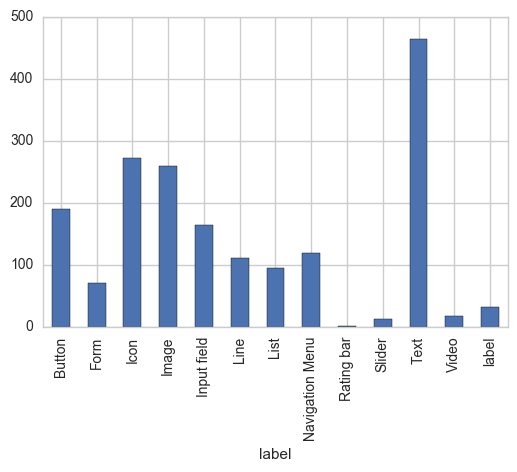

In [5]:
df.groupby("label").count().id.plot(kind="bar")#, color=sns.color_palette()[0])

In [6]:
#only take the labels for which we have at least 100 entries
df = filter_top_100(df)
print("%i labels left"%len(df))

1581 labels left


C:\Users\feita1\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [7]:
#pickle_images("img_labeled/logs/", df)

In [4]:
path = "data.pkl"
x_train, y_train, x_test, y_test = load_pickle(path)

In [3]:
import sklearn.model_selection

ImportError: No module named model_selection

In [ ]:
import sklearn.model_selection